##스텝-다운 조기상환형 ELS
스텝-다운 조기상환형 ELS는 기초 자산의 가격이 특정 조건을 충족할 때 조기 상환이 이루어지는 구조를 가진 주가연계증권입니다.
 여기서는 기초 자산으로 S&P 500 지수를 사용하겠습니다.

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


초기 가격: 3700.65
최종 가격: 3839.50
총 수익: 943333.33
수익: 843333.33


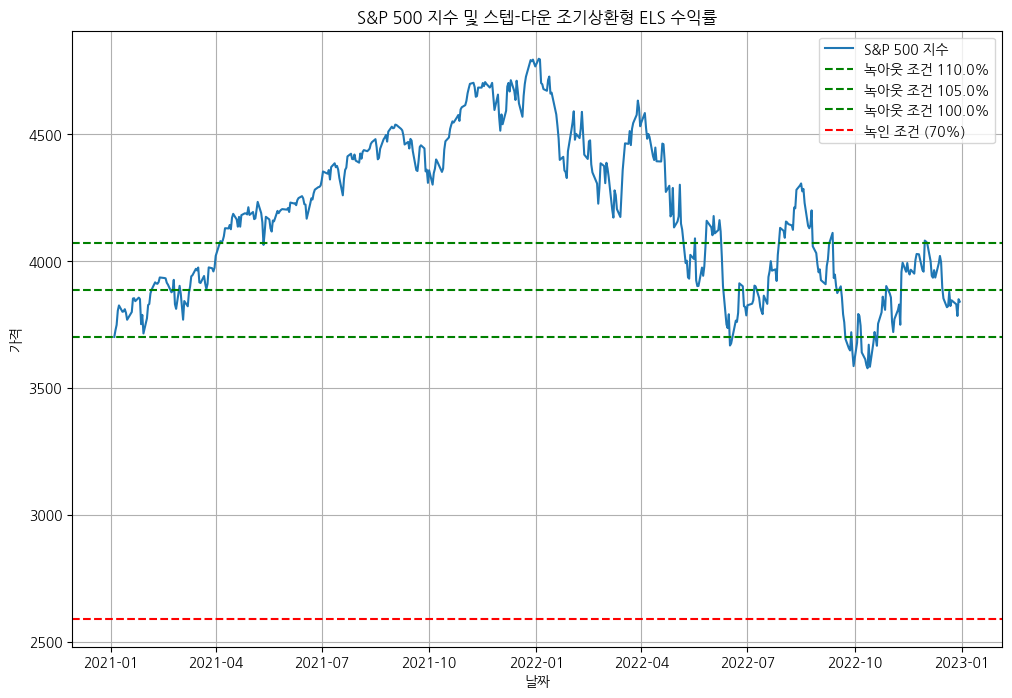

In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# 스텝-다운 조기상환형 ELS의 수익률 계산 함수
def step_down_els(prices, initial_price, coupon_rate, knock_in_barrier, knock_out_barrier_schedule, observation_dates, principal):
    """
    prices: 기초 자산의 가격 배열
    initial_price: 기초 자산의 초기 가격
    coupon_rate: 쿠폰 금리
    knock_in_barrier: 녹인 조건
    knock_out_barrier_schedule: 스텝다운 녹아웃 조건 배열
    observation_dates: 조기 상환 관찰 날짜 배열
    principal: 원금
    """
    is_knock_in = False
    for i, obs_date in enumerate(observation_dates):
        if prices[obs_date] >= initial_price * knock_out_barrier_schedule[i]:
            total_return = principal * (1 + coupon_rate * (obs_date + 1) / len(observation_dates))
            return total_return

    # 만기 시점 처리
    if min(prices) <= initial_price * knock_in_barrier:
        is_knock_in = True

    if is_knock_in:
        total_return = principal * (prices[-1] / initial_price)
    else:
        total_return = principal * (1 + coupon_rate * len(observation_dates) / len(observation_dates))

    return total_return

# 실제 데이터 가져오기
# S&P 500 지수 데이터
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start="2021-01-01", end="2023-01-01")
prices = sp500_data['Close'].values
initial_price = prices[0]  # 초기 가격

# 기본 변수 설정
coupon_rate = 0.1  # 쿠폰 금리 (10%)
knock_in_barrier = 0.7  # 녹인 조건 (70%)
knock_out_barrier_schedule = [1.1, 1.05, 1.0]  # 스텝다운 녹아웃 조건
observation_dates = np.array([252, 504, 756])  # 조기 상환 관찰 날짜 (매년)
principal = 100000  # 원금 (100,000 달러)

# 스텝-다운 조기상환형 ELS의 수익률 계산
total_return = step_down_els(prices, initial_price, coupon_rate, knock_in_barrier, knock_out_barrier_schedule, observation_dates, principal)
profit = total_return - principal

print(f"초기 가격: {initial_price:.2f}")
print(f"최종 가격: {prices[-1]:.2f}")
print(f"총 수익: {total_return:.2f}")
print(f"수익: {profit:.2f}")

# ELS 수익률 시계열 계산
els_prices = np.full_like(prices, principal)
is_knock_in = False
for i, obs_date in enumerate(observation_dates):
    if prices[obs_date] >= initial_price * knock_out_barrier_schedule[i]:
        els_prices[obs_date:] = principal * (1 + coupon_rate * (obs_date + 1) / len(observation_dates))
        break
    if min(prices[:obs_date+1]) <= initial_price * knock_in_barrier:
        is_knock_in = True

if not is_knock_in:
    els_prices[-1] = principal * (1 + coupon_rate * len(observation_dates) / len(observation_dates))
elif is_knock_in:
    els_prices[-1] = principal * (prices[-1] / initial_price)

# 시각화
dates = sp500_data.index

plt.figure(figsize=(12, 8))
plt.plot(dates, prices, label='S&P 500 지수')
for i, barrier in enumerate(knock_out_barrier_schedule):
    plt.axhline(y=initial_price * barrier, color='g', linestyle='--', label=f'녹아웃 조건 {barrier * 100:.1f}%')
plt.axhline(y=initial_price * knock_in_barrier, color='r', linestyle='--', label='녹인 조건 (70%)')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('S&P 500 지수 및 스텝-다운 조기상환형 ELS 수익률')
plt.legend()
plt.grid(True)
plt.show()


초기 가격: 3700.65
최종 가격: 3839.50
총 수익: 943333.33
수익: 843333.33


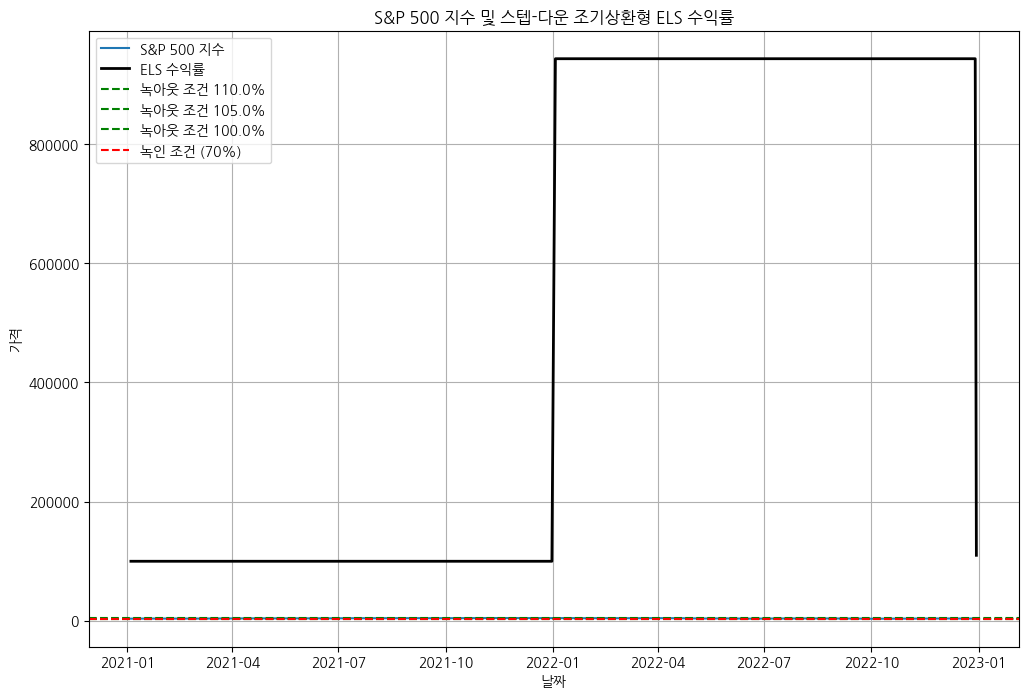

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# 스텝-다운 조기상환형 ELS의 수익률 계산 함수
def step_down_els(prices, initial_price, coupon_rate, knock_in_barrier, knock_out_barrier_schedule, observation_dates, principal):
    """
    prices: 기초 자산의 가격 배열
    initial_price: 기초 자산의 초기 가격
    coupon_rate: 쿠폰 금리
    knock_in_barrier: 녹인 조건
    knock_out_barrier_schedule: 스텝다운 녹아웃 조건 배열
    observation_dates: 조기 상환 관찰 날짜 배열
    principal: 원금
    """
    is_knock_in = False
    for i, obs_date in enumerate(observation_dates):
        if prices[obs_date] >= initial_price * knock_out_barrier_schedule[i]:
            total_return = principal * (1 + coupon_rate * (obs_date + 1) / len(observation_dates))
            return total_return

    # 만기 시점 처리
    if min(prices) <= initial_price * knock_in_barrier:
        is_knock_in = True

    if is_knock_in:
        total_return = principal * (prices[-1] / initial_price)
    else:
        total_return = principal * (1 + coupon_rate * len(observation_dates) / len(observation_dates))

    return total_return

# 실제 데이터 가져오기
# S&P 500 지수 데이터
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start="2021-01-01", end="2023-01-01")
prices = sp500_data['Close'].values
initial_price = prices[0]  # 초기 가격

# 기본 변수 설정
coupon_rate = 0.1  # 쿠폰 금리 (10%)
knock_in_barrier = 0.7  # 녹인 조건 (70%)
knock_out_barrier_schedule = [1.1, 1.05, 1.0]  # 스텝다운 녹아웃 조건
observation_dates = np.array([252, 504, 756])  # 조기 상환 관찰 날짜 (매년)
principal = 100000  # 원금 (100,000 달러)

# 스텝-다운 조기상환형 ELS의 수익률 계산
total_return = step_down_els(prices, initial_price, coupon_rate, knock_in_barrier, knock_out_barrier_schedule, observation_dates, principal)
profit = total_return - principal

print(f"초기 가격: {initial_price:.2f}")
print(f"최종 가격: {prices[-1]:.2f}")
print(f"총 수익: {total_return:.2f}")
print(f"수익: {profit:.2f}")

# ELS 수익률 시계열 계산
els_prices = np.full_like(prices, principal)
is_knock_in = False
for i, obs_date in enumerate(observation_dates):
    if prices[obs_date] >= initial_price * knock_out_barrier_schedule[i]:
        els_prices[obs_date:] = principal * (1 + coupon_rate * (obs_date + 1) / len(observation_dates))
        break
    if min(prices[:obs_date+1]) <= initial_price * knock_in_barrier:
        is_knock_in = True

if not is_knock_in:
    els_prices[-1] = principal * (1 + coupon_rate * len(observation_dates) / len(observation_dates))
elif is_knock_in:
    els_prices[-1] = principal * (prices[-1] / initial_price)

# 시각화
dates = sp500_data.index

plt.figure(figsize=(12, 8))
plt.plot(dates, prices, label='S&P 500 지수')
plt.plot(dates, els_prices, label='ELS 수익률', linewidth=2, color='black')
for i, barrier in enumerate(knock_out_barrier_schedule):
    plt.axhline(y=initial_price * barrier, color='g', linestyle='--', label=f'녹아웃 조건 {barrier * 100:.1f}%')
plt.axhline(y=initial_price * knock_in_barrier, color='r', linestyle='--', label='녹인 조건 (70%)')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('S&P 500 지수 및 스텝-다운 조기상환형 ELS 수익률')
plt.legend()
plt.grid(True)
plt.show()
